<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Project_Digital_Classification_SVHN_Thiru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
projfolder = '/content/drive/My Drive/AIML/AI/NNProject/'

In [0]:
import tensorflow.compat.v1 as tf
#tf.reset_default_graph()
#tf.compat.v1.disable_eager_execution()
import h5py
file=projfolder+'SVHN_single_grey1.h5'
f= h5py.File(file,'r')

##Step 1: Load Train and Test data from .h5 file

In [8]:
#Load the X_train, X_test, Y_train, Y_test, X_val and Y_val datasets from the h5py file	2
list(f.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [9]:
for key in list(f.keys()):
  print('Shape of '+key+':'+str(f[key].shape))

Shape of X_test:(18000, 32, 32)
Shape of X_train:(42000, 32, 32)
Shape of X_val:(60000, 32, 32)
Shape of y_test:(18000,)
Shape of y_train:(42000,)
Shape of y_val:(60000,)


In [0]:
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']

## Step 2: Flatten the images for Keras

In [82]:
 #Flatten the images for Keras	2
 X_test.reshape(18000,1024)

AttributeError: ignored

In [94]:
# through thies error AttributeError: 'Dataset' object has no attribute 'reshape', need to convert to numpy array
X_test = np.array(X_test)
print('before converting',X_test.shape)
X_test = X_test.reshape(18000,1024)
print('after converting Test Size',X_test.shape)
#similarly convert required dataset to numpy array and reshape 32X32 into 1024
X_train = np.array(X_train).reshape(42000,1024)

print('after converting Train Size',X_train.shape)

before converting (18000, 32, 32)
after converting Test Size (18000, 1024)
after converting Train Size (42000, 1024)


### Verifying the image

Label:  [143.1893 141.7164 129.8146 ...  67.7635  68.3613  73.3608]


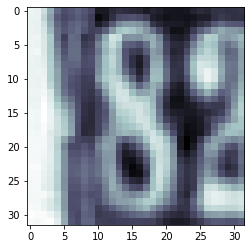

In [95]:
import matplotlib.pyplot as plt
import numpy as np
# testing the image in the index 105
print('Label: ', X_train[105])
plt.imshow(X_train[105].reshape(32,32), cmap=plt.cm.bone);

In [96]:
#printing the value in y_train same index number 105
print('Label at 10 : ', y_train[105])

Label at 10 :  8


## Step 3: Normalize the inputs from 0 to 1

In [97]:
#Normalize the inputs for X_train, X_test and X_val	1
X_train[0:2]

array([[33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
       [86.9591, 87.0685, 88.3735, ..., 75.2206, 76.6396, 79.2865]],
      dtype=float32)

In [98]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train[0:2]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745]], dtype=float32)

##Step 4: Conert the class matrices / Label into one hot vectors

In [101]:
#Convert the class matrices Y_train, Y_test and Y_val into one hot vectors	1
print('Before one hot conversion :',y_train[0:5])
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
print('After one hot conversion :',y_train[0:5])

Before one hot conversion : [2 6 7 4 4]
After one hot conversion : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Step 5: Print train and Test val shapes

In [102]:
#Print the train, test and val shapes	2
print('Shape of Training set Train:', X_train.shape, 'Test:', X_test.shape )

Shape of Training set Train: (42000, 1024) Test: (18000, 1024)


##Step 6: Visualize the first 10 images in X_train and the corresponding Y_train labels

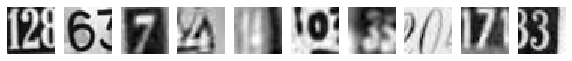

In [103]:
#Visualize the first 10 images in X_train and the corresponding Y_train labels	2
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()

In [106]:
print(y_train[0:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


##Step 7: In the train and test loop, define the hyperparameters for the model

In [0]:
#In the train and test loop, define the hyperparameters for the model	4
learning_rate = 0.001
activation = 'relu'
optimizer='sgd'
loss='categorical_crossentropy'
batch_size = 32


##Step 8: Create a Sequential model in Keras

In [0]:
#Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions	8
#Initialize sequential model
model = tf.keras.models.Sequential()
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(1024,)))
#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(100,activation = 'relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

##Step 9: Define the optimizer to be used in this model

In [0]:
#Define the optimizer to be used in this model	2
sgd_optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

##Step 10: Compile the model with the corresponding Loss and metrics to monitor

In [0]:
#Compile the model with the corresponding Loss and metrics to monitor	2
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

##Step 12: Fit the model and use model.Evaluate to return the score

In [125]:
#Fit the model and use model.evaluate() to return the score	1
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 114us/sample - loss: 2.3038 - acc: 0.1041 - val_loss: 2.3011 - val_acc: 0.1134
Epoch 2/10
42000/42000 [==============================] - 4s 105us/sample - loss: 2.3002 - acc: 0.1162 - val_loss: 2.2988 - val_acc: 0.1178
Epoch 3/10
42000/42000 [==============================] - 4s 107us/sample - loss: 2.2981 - acc: 0.1197 - val_loss: 2.2968 - val_acc: 0.1223
Epoch 4/10
42000/42000 [==============================] - 5s 108us/sample - loss: 2.2961 - acc: 0.1268 - val_loss: 2.2946 - val_acc: 0.1302
Epoch 5/10
42000/42000 [==============================] - 4s 105us/sample - loss: 2.2937 - acc: 0.1353 - val_loss: 2.2923 - val_acc: 0.1377
Epoch 6/10
42000/42000 [==============================] - 4s 106us/sample - loss: 2.2914 - acc: 0.1433 - val_loss: 2.2899 - val_acc: 0.1474
Epoch 7/10
42000/42000 [==============================] - 4s 106us/sample - loss: 2.2888 - acc: 0.1509 - val_l

In [126]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 123,820
Trainable params: 123,820
Non-trainable params: 0
________________________________________________

In [0]:
model.evaluate()

#Step 13: Disable Regularization by setting appropriate value for Lambda and check the loss of the NN

In [151]:
#Disable Regularization by setting appropriate value for Lambda and check the loss of the NN	2
#Normalize the data
# example of l2 on a dense layer
from keras.layers import Dense
from keras.regularizers import l2

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(200,activation = 'relu'))
model2.add(tf.keras.layers.Dense(200, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(tf.keras.layers.Dense(100,activation = 'relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 166us/sample - loss: 4.2485 - acc: 0.1051 - val_loss: 4.1890 - val_acc: 0.1099
Epoch 2/10
42000/42000 [==============================] - 6s 151us/sample - loss: 4.1359 - acc: 0.1230 - val_loss: 4.0840 - val_acc: 0.1246
Epoch 3/10
42000/42000 [==============================] - 6s 153us/sample - loss: 4.0334 - acc: 0.1403 - val_loss: 3.9825 - val_acc: 0.1627
Epoch 4/10
42000/42000 [==============================] - 7s 155us/sample - loss: 3.9349 - acc: 0.1659 - val_loss: 3.8879 - val_acc: 0.1738
Epoch 5/10
42000/42000 [==============================] - 6s 154us/sample - loss: 3.8406 - acc: 0.1907 - val_loss: 3.7942 - val_acc: 0.2173
Epoch 6/10
42000/42000 [==============================] - 7s 156us/sample - loss: 3.7494 - acc: 0.2184 - val_loss: 3.7050 - val_acc: 0.2290
Epoch 7/10
42000/42000 [==============================] - 6s 154us/sample - loss: 3.6611 - acc: 0.2427 - val_l

In [130]:
#Seeing the accuracy increases from 13% to 65% - try increasing the epochs and see it the max accuracy
#model2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 143us/sample - loss: 3.0199 - acc: 0.6862 - val_loss: 2.9467 - val_acc: 0.7079
Epoch 2/20
42000/42000 [==============================] - 6s 140us/sample - loss: 2.9446 - acc: 0.6952 - val_loss: 2.8756 - val_acc: 0.7148
Epoch 3/20
42000/42000 [==============================] - 6s 143us/sample - loss: 2.8662 - acc: 0.7047 - val_loss: 2.8063 - val_acc: 0.7212
Epoch 4/20
42000/42000 [==============================] - 6s 139us/sample - loss: 2.7975 - acc: 0.7082 - val_loss: 2.7416 - val_acc: 0.7263
Epoch 5/20
42000/42000 [==============================] - 6s 141us/sample - loss: 2.7303 - acc: 0.7148 - val_loss: 2.6770 - val_acc: 0.7313
Epoch 6/20
42000/42000 [==============================] - 6s 139us/sample - loss: 2.6641 - acc: 0.7229 - val_loss: 2.6150 - val_acc: 0.7383
Epoch 7/20
42000/42000 [==============================] - 6s 137us/sample - loss: 2.5995 - acc: 0.7279 - val_l

##Step 14: Increase the Regularization parameter (Lambda) and check how the loss is for the NN. Record findings

In [150]:
#Increase the Regularization parameter (Lambda) and check how the loss is for the NN. Record findings	2
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(200,activation = 'relu'))
model3.add(tf.keras.layers.Dense(200, kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
model3.add(tf.keras.layers.Dense(100,activation = 'relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 185us/sample - loss: 17.9218 - acc: 0.1084 - val_loss: 14.1681 - val_acc: 0.1216
Epoch 2/10
42000/42000 [==============================] - 7s 157us/sample - loss: 11.5321 - acc: 0.1277 - val_loss: 9.3148 - val_acc: 0.1367
Epoch 3/10
42000/42000 [==============================] - 7s 157us/sample - loss: 7.7559 - acc: 0.1470 - val_loss: 6.4459 - val_acc: 0.1487
Epoch 4/10
42000/42000 [==============================] - 6s 155us/sample - loss: 5.5239 - acc: 0.1624 - val_loss: 4.7489 - val_acc: 0.1754
Epoch 5/10
42000/42000 [==============================] - 7s 156us/sample - loss: 4.2041 - acc: 0.1802 - val_loss: 3.7458 - val_acc: 0.1889
Epoch 6/10
42000/42000 [==============================] - 7s 157us/sample - loss: 3.4235 - acc: 0.1921 - val_loss: 3.1527 - val_acc: 0.2091
Epoch 7/10
42000/42000 [==============================] - 7s 157us/sample - loss: 2.9618 - acc: 0.2163 - va

In [149]:
model3_bn = tf.keras.models.Sequential()
model3_bn.add(tf.keras.layers.Dense(200,activation = 'relu'))
model3_bn.add(tf.keras.layers.BatchNormalization())
model3_bn.add(tf.keras.layers.Dense(100,activation='relu'))
model3_bn.add(tf.keras.layers.Dense(10,activation='softmax'))
model3_bn.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model3_bn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 162us/sample - loss: 2.2663 - acc: 0.1764 - val_loss: 2.1247 - val_acc: 0.2619
Epoch 2/10
42000/42000 [==============================] - 6s 147us/sample - loss: 2.0123 - acc: 0.3309 - val_loss: 1.8831 - val_acc: 0.4042
Epoch 3/10
42000/42000 [==============================] - 6s 149us/sample - loss: 1.7726 - acc: 0.4578 - val_loss: 1.6567 - val_acc: 0.4997
Epoch 4/10
42000/42000 [==============================] - 6s 150us/sample - loss: 1.5677 - acc: 0.5394 - val_loss: 1.4720 - val_acc: 0.5733
Epoch 5/10
42000/42000 [==============================] - 6s 145us/sample - loss: 1.4113 - acc: 0.5897 - val_loss: 1.3427 - val_acc: 0.6146
Epoch 6/10
42000/42000 [==============================] - 6s 149us/sample - loss: 1.2979 - acc: 0.6252 - val_loss: 1.2371 - val_acc: 0.6435
Epoch 7/10
42000/42000 [==============================] - 6s 145us/sample - loss: 1.2153 - acc: 0.6451 - val_l

Increasing the lambda from 0.01 to 0.1 the loss is reducing

#Step 15: Network overfit with a small subset of the dataset. Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%


In [160]:
#Network overfit with a small subset of the dataset. Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%.	2
X_train_subset = X_train[0:4200]
X_test_subset = X_test[0:4200]
y_train_subset = y_train[0:4200]
y_test_subset = y_test[0:4200]
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
small_model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
small_model.fit(X_train_subset,y_train_subset,epochs=10,validation_data=(X_test_subset,y_test_subset),batch_size=32)

Train on 4200 samples, validate on 4200 samples
Epoch 1/10
4200/4200 [==============================] - 1s 271us/sample - loss: 2.3349 - acc: 0.0848 - val_loss: 2.3209 - val_acc: 0.0783
Epoch 2/10
4200/4200 [==============================] - 0s 88us/sample - loss: 2.3129 - acc: 0.0886 - val_loss: 2.3142 - val_acc: 0.0786
Epoch 3/10
4200/4200 [==============================] - 0s 91us/sample - loss: 2.3119 - acc: 0.0819 - val_loss: 2.3165 - val_acc: 0.0833
Epoch 4/10
4200/4200 [==============================] - 0s 89us/sample - loss: 2.3110 - acc: 0.0895 - val_loss: 2.3145 - val_acc: 0.0783
Epoch 5/10
4200/4200 [==============================] - 0s 97us/sample - loss: 2.3099 - acc: 0.0888 - val_loss: 2.3127 - val_acc: 0.0812
Epoch 6/10
4200/4200 [==============================] - 0s 89us/sample - loss: 2.3098 - acc: 0.0900 - val_loss: 2.3127 - val_acc: 0.0829
Epoch 7/10
4200/4200 [==============================] - 0s 89us/sample - loss: 2.3087 - acc: 0.0921 - val_loss: 2.3123 - val_acc:

With small model and reduced 10% of the dataset we are able to get 100% accuracy - which is OVERFITTING

##Step 16: Load the original dataset with all the images and prepare the data for modelling


In [165]:
#Load the original dataset with all the images and prepare the data for modelling	4
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']
X_test = np.array(X_test)
X_test = X_test.reshape(18000,1024)
#similarly convert required dataset to numpy array and reshape 32X32 into 1024
X_train = np.array(X_train).reshape(42000,1024)
#Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
#one hot encoding labels
print('Before one hot conversion :',y_train[0:5])
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
print('After one hot conversion :',y_train[0:5])

Before one hot conversion : [2 6 7 4 4]
After one hot conversion : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


##Step 17: Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings


In [173]:
#Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings	4
model5= tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(200,activation = 'relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Dense(100,activation='relu'))
model5.add(tf.keras.layers.Dense(10,activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.5)
model5.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 184us/sample - loss: 1.7165 - acc: 0.4050 - val_loss: 1.9906 - val_acc: 0.4037
Epoch 2/10
42000/42000 [==============================] - 7s 161us/sample - loss: 1.3903 - acc: 0.5483 - val_loss: 2.3490 - val_acc: 0.3471
Epoch 3/10
42000/42000 [==============================] - 7s 157us/sample - loss: 1.2811 - acc: 0.5901 - val_loss: 1.4437 - val_acc: 0.5204
Epoch 4/10
42000/42000 [==============================] - 7s 158us/sample - loss: 1.2357 - acc: 0.6097 - val_loss: 3.2726 - val_acc: 0.2388
Epoch 5/10
42000/42000 [==============================] - 7s 160us/sample - loss: 1.1813 - acc: 0.6293 - val_loss: 1.6166 - val_acc: 0.5287
Epoch 6/10
42000/42000 [==============================] - 7s 160us/sample - loss: 1.1494 - acc: 0.6407 - val_loss: 1.0619 - val_acc: 0.6658
Epoch 7/10
42000/42000 [==============================] - 7s 156us/sample - loss: 1.1319 - acc: 0.6500 - val_l

<font color="red">Learning Rate 0.001</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 184us/sample - loss: 2.2717 - acc: 0.1758 - val_loss: 2.1247 - val_acc: 0.2543
<br>Epoch 10/10
42000/42000 [=] - 7s 158us/sample - loss: 1.0986 - acc: 0.6772 - val_loss: 1.0553 - val_acc: 0.6950
<br><br><font color="red">Learning Rate 0.01</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 180us/sample - loss: 1.6713 - acc: 0.4598 - val_loss: 1.4193 - val_acc: 0.5287
<br>Epoch 10/10
42000/42000 [=] - 6s 152us/sample - loss: 0.9359 - acc: 0.7125 - val_loss: 1.2810 - val_acc: 0.5940
<br><br><font color="red">Learning Rate 0.05</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 190us/sample - loss: 1.6779 - acc: 0.4472 - val_loss: 2.5653 - val_acc: 0.2830
<br>Epoch 10/10
42000/42000 [=] - 7s 159us/sample - loss: 1.2071 - acc: 0.6093 - val_loss: 1.1955 - val_acc: 0.6128
<br><br><font color="red">Learning Rate 0.1</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 186us/sample - loss: 1.6702 - acc: 0.4298 - val_loss: 3.2386 - val_acc: 0.2166
<br>Epoch 10/10
42000/42000 [=] - 7s 162us/sample - loss: 1.2186 - acc: 0.6075 - val_loss: 1.4296 - val_acc: 0.5257
<br><br><font color="red">Learning Rate 0.3</font>
<br>Epoch 1/10
42000/42000 [=] - 8s 187us/sample - loss: 1.6386 - acc: 0.4402 - val_loss: 1.5808 - val_acc: 0.4878
<br>Epoch 10/10
42000/42000 [=] - 8s 200us/sample - loss: 0.9615 - acc: 0.7027 - val_loss: 1.2401 - val_acc: 0.6176


##Step 18: Perform Hyperparameter Optimization

In [195]:
#Perform Hyperparameter Optimization . Record findings	4
#changing optimizer to Adam
model5= tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(1024,activation = 'relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Dense(512,activation='relu'))
model5.add(tf.keras.layers.Dense(256,activation='relu'))
model5.add(tf.keras.layers.Dense(128,activation='relu'))
model5.add(tf.keras.layers.Dense(10,activation='softmax'))
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model5.compile(optimizer=adam_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 23s 558us/sample - loss: 1.3400 - acc: 0.5550 - val_loss: 2.4633 - val_acc: 0.2915
Epoch 2/10
42000/42000 [==============================] - 21s 512us/sample - loss: 0.9914 - acc: 0.6861 - val_loss: 1.2912 - val_acc: 0.6069
Epoch 3/10
42000/42000 [==============================] - 21s 497us/sample - loss: 0.8684 - acc: 0.7258 - val_loss: 0.9554 - val_acc: 0.6959
Epoch 4/10
42000/42000 [==============================] - 21s 497us/sample - loss: 0.7765 - acc: 0.7547 - val_loss: 1.1173 - val_acc: 0.6419
Epoch 5/10
42000/42000 [==============================] - 21s 495us/sample - loss: 0.7040 - acc: 0.7793 - val_loss: 0.9174 - val_acc: 0.7161
Epoch 6/10
42000/42000 [==============================] - 21s 503us/sample - loss: 0.6617 - acc: 0.7902 - val_loss: 1.3836 - val_acc: 0.5947
Epoch 7/10
42000/42000 [==============================] - 21s 499us/sample - loss: 0.6175 - acc: 0.8062 

Model Config:<font color="red">
BatchNormalization, Adam Optimizer with learning rate 0.001</font>
<br>Epoch 1/10
42000/42000 - 9s 209us/sample - loss: 1.4179 - acc: 0.5520 - val_loss: 1.5119 - val_acc: 0.5004
<br>Epoch 10/10
42000/42000  - 7s 178us/sample - loss: 0.7657 - acc: 0.7663 - val_loss: 1.0693 - val_acc: 0.6824
<br>
Model Config:
BatchNormalization, Adam Optimizer with <font color="red">learning rate 0.01</font>
<br>
Epoch 1/10
42000/42000  - 10s 240us/sample - loss: 1.6192 - acc: 0.4372 - val_loss: 2.7127 - val_acc: 0.3062
<br>Epoch 10/10
42000/42000  - 8s 202us/sample - loss: 1.0224 - acc: 0.6829 - val_loss: 1.0512 - val_acc: 0.6731
Model Config:
BatchNormalization, Adam Optimizer with learning rate 0.001
changing <font color="red">batch_size from 32 to 64 </font>
<br>Epoch 1/10
42000/42000  - 7s 163us/sample - loss: 1.4260 - acc: 0.5518 - val_loss: 1.5168 - val_acc: 0.4904
<br>Epoch 10/10
42000/42000  - 5s 121us/sample - loss: 0.6674 - acc: 0.8002 - val_loss: 1.0364 - val_acc: 0.6982
<br><br>
Epoch 1/10
42000/42000  - 23s 558us/sample - loss: 1.3400 - acc: 0.5550 - val_loss: 2.4633 - val_acc: 0.2915
<br>Epoch 10/10
42000/42000  - 21s 497us/sample - loss: 0.5378 - acc: 0.8287 - val_loss: 0.8199 - val_acc: 0.7449



### Hyperparameter Optimization using RandomSearchCV

In [1]:

def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(512, input_shape=(1024,)))
    model.add(Activation('relu')) 
    model.add(Dropout(0.2))  
    model.add(Dense(512,init=init))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,init=init))
    model.add(Activation('softmax')) 
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from time import time
start= time()
model = KerasClassifier(build_fn=create_model,verbose=1)
n_iter_search = 16 # Number of parameter settings that are sampled.
optimizers = ['rmsprop','sgd', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([10, 15])
batches = np.array([32,64])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)

random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid,
                                   n_iter=n_iter_search)
random_search.fit(X_train, y_train)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
print("total time:",time()-start)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Using TensorFlow backend.


NameError: ignored

##Step 19: Best hyperparameters found in the previous step (Step 18)

In [0]:
#Set the best hyperparameters found in the previous step. Check the Network’s accuracy.	7